In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [36]:
train = pd.read_csv('titanic_train.csv')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


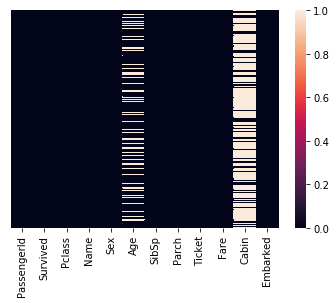

In [38]:
sns.heatmap(train.isnull(),yticklabels=False)

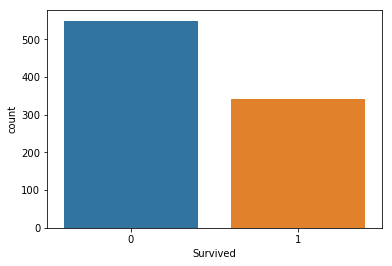

In [39]:
sns.countplot(x='Survived', data=train)

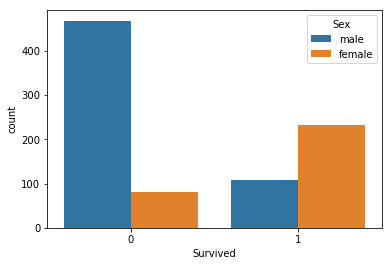

In [40]:
sns.countplot(x='Survived', data=train, hue='Sex')

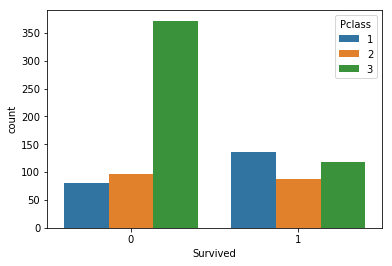

In [41]:
sns.countplot(x='Survived', data=train, hue='Pclass')

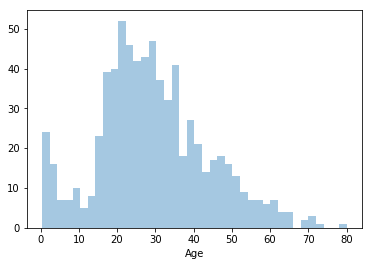

In [42]:
sns.distplot(train.Age.dropna(), kde=False, bins=40)

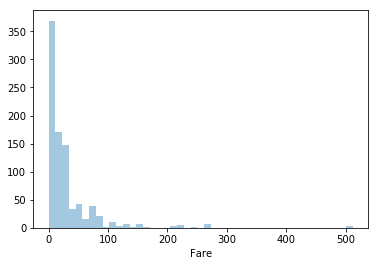

In [43]:
sns.distplot(train.Fare.dropna(), kde=False, bins=45)

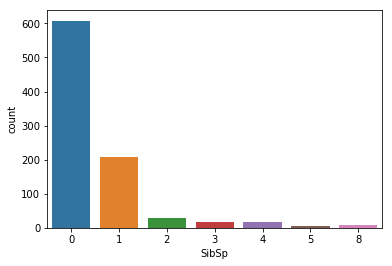

In [44]:
sns.countplot(train.SibSp)

In [45]:
# Dealing with the missing data

In [46]:
#Filling in the missing age values


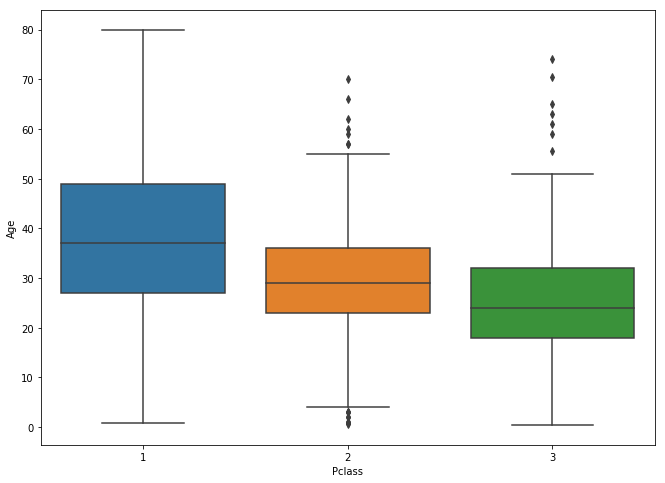

In [47]:
plt.figure(figsize=(11,8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [48]:
# It is apparent that age is realted to passenger class. It is possible to fill the missing values with the average age but a better option would be fill ages based upon the passgenger class column

In [49]:
def calc_age(col):
    Age = col[0]
    Pass_class = col[1]
    
    if pd.isnull(Age):
        
        if Pass_class == 1:
            return 37
        elif Pass_class == 2:
            return 29
        else:
            return 24
    else:
        return Age
train['Age'] = train[['Age','Pclass']].apply(calc_age, axis=1)            

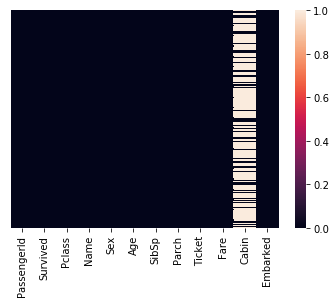

In [50]:
# Missing age values have been filled
sns.heatmap(train.isnull(),yticklabels=False)

In [51]:
train.drop('Cabin', axis=1, inplace=True)

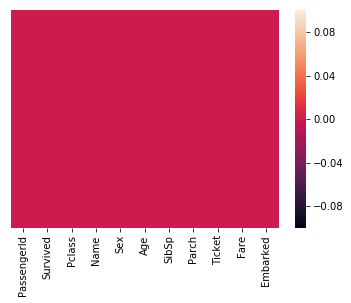

In [52]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False)

In [53]:
# Handling catagorical features

In [54]:
binarysex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
Passengerclass = pd.get_dummies(train['Pclass'],drop_first=True)
train.drop(['Ticket','Embarked','Name','Sex','PassengerId','Pclass'], axis=1, inplace=True)
# drop one column to avoid multicollinearity
train = pd.concat([binarysex,embarked,Passengerclass,train], axis = 1)

In [55]:
train.head()

,male,Q,S,2,3,Survived,Age,SibSp,Parch,Fare
0,1,0,1,0,1,0,22.0,1,0,7.2500
1,0,0,0,0,0,1,38.0,1,0,71.2833
2,0,0,1,0,1,1,26.0,0,0,7.9250
3,0,0,1,0,0,1,35.0,1,0,53.1000
4,1,0,1,0,1,0,35.0,0,0,8.0500


In [56]:
# Extracting the training set and test set from the data
X = train.drop('Survived', axis = 1)
y = train['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [57]:
# Cleaning and preparing the new Xdata
NewX = pd.read_csv('titanic_test.csv')

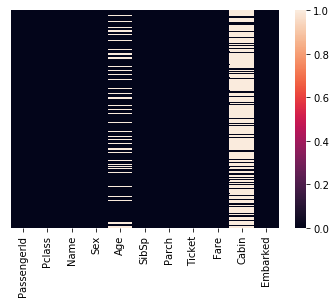

In [58]:
sns.heatmap(NewX.isnull(),yticklabels=False)

In [59]:
NewX['Age'] = NewX[['Age','Pclass']].apply(calc_age, axis=1)
NewX.drop('Cabin', axis=1, inplace=True)
NewX.dropna(inplace=True)

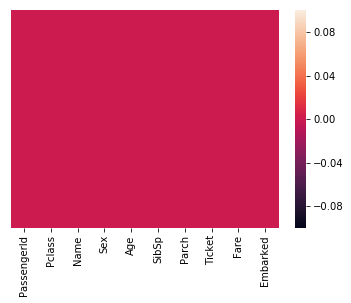

In [60]:
sns.heatmap(NewX.isnull(),yticklabels=False)

In [61]:
binarysex2 = pd.get_dummies(NewX['Sex'],drop_first=True)
embarked2 = pd.get_dummies(NewX['Embarked'], drop_first=True)
Passengerclass2 = pd.get_dummies(NewX['Pclass'],drop_first=True)
NewX.drop(['Ticket','Embarked','Name','Sex','PassengerId','Pclass'], axis=1, inplace=True)
# drop one column to avoid multicollinearity
NewX = pd.concat([binarysex2,embarked2,Passengerclass2,NewX], axis = 1)
NewX.head()

,male,Q,S,2,3,Age,SibSp,Parch,Fare
0,1,1,0,0,1,34.5,0,0,7.8292
1,0,0,1,0,1,47.0,1,0,7.0000
2,1,1,0,1,0,62.0,0,0,9.6875
3,1,0,1,0,1,27.0,0,0,8.6625
4,0,0,1,0,1,22.0,1,1,12.2875


In [80]:
# Fitting and applying the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
logmodel.score(X_test,y_test)

0.79400749063670417

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.80      0.87      0.83       159
          1       0.78      0.68      0.73       108

avg / total       0.79      0.79      0.79       267



array([[139,  20],
       [ 35,  73]])

In [65]:
# Predicting the new data
logmodel.fit(X,y)
y_pred2 = logmodel.predict(NewX)
print(y_pred2)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]


In [107]:
# Tuning the C value
# Fitting and applying the logistic regression model
import numpy as np
max_score=[]
best_c = []
inter = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.2,2.3,2.5,2.7,2.9,3.3,3.5,3.7,3.9,4.1]
for num in inter:
    logmodel = LogisticRegression(C = num)
    logmodel.fit(X_train,y_train)
    score = logmodel.score(X_test,y_test)
    max_score.append(score)
    best_c.append(num)
print(max_score)
print(best_c)


[0.80524344569288386, 0.80149812734082393, 0.797752808988764, 0.79026217228464424, 0.79400749063670417, 0.79400749063670417, 0.79400749063670417, 0.79400749063670417, 0.797752808988764, 0.797752808988764, 0.797752808988764, 0.797752808988764, 0.79400749063670417, 0.79400749063670417, 0.79400749063670417, 0.79400749063670417, 0.79026217228464424, 0.79400749063670417, 0.79400749063670417, 0.79400749063670417, 0.79400749063670417]
[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.2, 2.3, 2.5, 2.7, 2.9, 3.3, 3.5, 3.7, 3.9, 4.1]


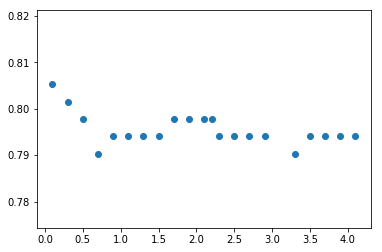

In [109]:
plt.scatter(best_c,max_score)

In [110]:
# using the best C we found in our findings
logmodel = LogisticRegression(C = 0.1)
logmodel.fit(X,y)
y_pred2 = logmodel.predict(NewX)
print(y_pred2)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 0 0 0]
